In [97]:
import eland as ed
import numpy as np

# Exploratory Data Analysis with eland

## Getting Started

To get started, let's explore the attributes of the `online-retail` index. First, we'll instantiate the data frame by pointing the constructor to a particular instance in our local elasticsearch cluster. 

The `online-retail` index was created by running `python load_data.py` from the `examples` directory.

In [2]:
df = ed.read_es("http://localhost:9200", "online-retail")

Here we see that the `"_id"` field was used to index our data frame. 

In [17]:
df.index.index_field

'_id'

Next, we can check which field from elasticsearch are available to our eland data frame. `columns` is available as a parameter when instantiating the data frame which allows one to choose only a subset of fields from your index to be included in the data frame. Since we didn't set this parameter, we have access to all fields.

In [19]:
df.columns

Index(['country', 'customer_id', 'description', 'invoice_date', 'invoice_no',
       'quantity', 'stock_code', 'unit_price'],
      dtype='object')

Now, let's see the data types of our fields. Running `df.dtypes`, we can see that elasticsearch field types are mapped to pandas field types.

In [20]:
df.dtypes

country                 object
customer_id             object
description             object
invoice_date    datetime64[ns]
invoice_no              object
quantity                 int64
stock_code              object
unit_price             float64
dtype: object

We also offer a `.info_es()` data frame method that shows all info about the underlying index. It also contains information about operations being passed from data frame methods to elasticsearch. More on this later.

In [70]:
print(df.info_es())

index_pattern: online-retail
Index:
	index_field: _id
	is_source_field: False
Mappings:
	capabilities:               _source es_dtype        pd_dtype  searchable  aggregatable
country          True  keyword          object        True          True
customer_id      True  keyword          object        True          True
description      True  keyword          object        True          True
invoice_date     True     date  datetime64[ns]        True          True
invoice_no       True  keyword          object        True          True
quantity         True  integer           int64        True          True
stock_code       True  keyword          object        True          True
unit_price       True    float         float64        True          True
Operations:
	tasks: []
	size: None
	sort_params: None
	columns: None
	post_processing: []



## Selecting and Indexing Data

Now that we understand how to create a data frame and get access to it's underlying attributes, let's see how we can select subsets of our data.

### head and tail

much like pandas, eland data frames offer `.head(n)` and `.tail(n)` methods that return the first and last n rows, respectively.

In [44]:
df.head(2)

,country,customer_id,description,invoice_date,invoice_no,quantity,stock_code,unit_price
wXcVa24BUkfJ5hz0pRsL,United Kingdom,17850,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,536365,6,85123A,2.55
wncVa24BUkfJ5hz0pRsL,United Kingdom,17850,WHITE METAL LANTERN,2010-12-01 08:26:00,536365,6,71053,3.39


In [23]:
df.tail(2)

,country,customer_id,description,invoice_date,invoice_no,quantity,stock_code,unit_price
vXgVa24BUkfJ5hz0txvj,United Kingdom,,MULTICOLOUR HONEYCOMB FAN,2011-01-20 18:08:00,541696,1,21209,1.63
vngVa24BUkfJ5hz0txvj,United Kingdom,,PACK OF 72 RETROSPOT CAKE CASES,2011-01-20 18:08:00,541696,1,21212,1.25


### selecting columns

you can also pass a list of columns to select columns from the data frame in a specified order.

In [56]:
df[['country', 'invoice_date']].head(5)

,country,invoice_date
wXcVa24BUkfJ5hz0pRsL,United Kingdom,2010-12-01 08:26:00
wncVa24BUkfJ5hz0pRsL,United Kingdom,2010-12-01 08:26:00
w3cVa24BUkfJ5hz0pRsL,United Kingdom,2010-12-01 08:26:00
xHcVa24BUkfJ5hz0pRsL,United Kingdom,2010-12-01 08:26:00
xXcVa24BUkfJ5hz0pRsL,United Kingdom,2010-12-01 08:26:00


### Boolean Indexing

we also allow you to filter the data frame using boolean indexing. Under the hood, a boolean index maps to a `terms` query that is then passed to elasticsearch to filter the index.

In [111]:
# the construction of a boolean vector maps directly to an elasticsearch query
print(df['country']=='Germany')
df[(df['country']=='Germany')].head(5)

{'term': {'country': 'Germany'}}


,country,customer_id,description,invoice_date,invoice_no,quantity,stock_code,unit_price
FncVa24BUkfJ5hz0pSBJ,Germany,12662,SET OF 6 T-LIGHTS SANTA,2010-12-01 13:04:00,536527,6,22809,2.95
F3cVa24BUkfJ5hz0pSBJ,Germany,12662,ROTATING SILVER ANGELS T-LIGHT HLDR,2010-12-01 13:04:00,536527,6,84347,2.55
GHcVa24BUkfJ5hz0pSBJ,Germany,12662,MULTI COLOUR SILVER T-LIGHT HOLDER,2010-12-01 13:04:00,536527,12,84945,0.85
GXcVa24BUkfJ5hz0pSBJ,Germany,12662,5 HOOK HANGER MAGIC TOADSTOOL,2010-12-01 13:04:00,536527,12,22242,1.65
GncVa24BUkfJ5hz0pSBJ,Germany,12662,3 HOOK HANGER MAGIC GARDEN,2010-12-01 13:04:00,536527,12,22244,1.95


# add isin example

We can also combine boolean vectors to further filter the data frame.

In [115]:
df[(df['country']=='Germany') & (df['quantity']>90)]

,country,customer_id,description,invoice_date,invoice_no,quantity,stock_code,unit_price
5XcVa24BUkfJ5hz0q3Mq,Germany,12471,FUNKY DIVA PEN,2010-12-10 09:35:00,538174,96,22741,0.85
7XcVa24BUkfJ5hz0q3Mq,Germany,12471,LIPSTICK PEN RED,2010-12-10 09:35:00,538174,100,22419,0.36
FHcVa24BUkfJ5hz0s-K9,Germany,12500,PACK OF 6 BIRDY GIFT TAGS,2011-01-10 09:48:00,540553,144,22585,1.06
XncVa24BUkfJ5hz0s-K9,Germany,12524,BOX OF 24 COCKTAIL PARASOLS,2011-01-10 10:35:00,540562,100,84692,0.42


Using this example, let see how eland translates this boolean filter to an elasticsearch `bool` query.

In [74]:
print(df[(df['country']=='Germany') & (df['quantity']>90)].info_es())

index_pattern: online-retail
Index:
	index_field: _id
	is_source_field: False
Mappings:
	capabilities:               _source es_dtype        pd_dtype  searchable  aggregatable
country          True  keyword          object        True          True
customer_id      True  keyword          object        True          True
description      True  keyword          object        True          True
invoice_date     True     date  datetime64[ns]        True          True
invoice_no       True  keyword          object        True          True
quantity         True  integer           int64        True          True
stock_code       True  keyword          object        True          True
unit_price       True    float         float64        True          True
Operations:
	tasks: [('boolean_filter', {'bool': {'must': [{'term': {'country': 'Germany'}}, {'range': {'quantity': {'gt': 90}}}]}})]
	size: None
	sort_params: None
	columns: None
	post_processing: []



## Aggregation and Descriptive Statistics

Let's begin to ask some questions of our data and use eland to get the answers.

**How many different countries are there?**

In [76]:
df['country'].nunique()

country    24
dtype: int64

**What is the total sum of products ordered?**

In [80]:
df['quantity'].sum()

quantity    548076.0
dtype: float64

**Show me the sum, mean, min, and max of the qunatity and unit_price fields**

In [93]:
df[['quantity','unit_price']].agg(['sum', 'mean', 'max', 'min'])

,quantity,unit_price
sum,548076.000000,383761.569666
mean,8.363231,5.855916
max,74215.000000,16888.019531
min,-74215.000000,0.000000


**Give me descriptive statistics for the entire data frame**

In [119]:
df.describe()

,quantity,unit_price
count,65534.000000,65534.000000
mean,8.363231,5.855916
std,413.694481,145.755942
min,-74215.000000,0.000000
25%,1.000000,1.250000
50%,2.000000,2.510000
75%,8.000000,4.234706
max,74215.000000,16888.019531


**Show me a histogram of numeric columns**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1193748d0>,
      dtype=object)

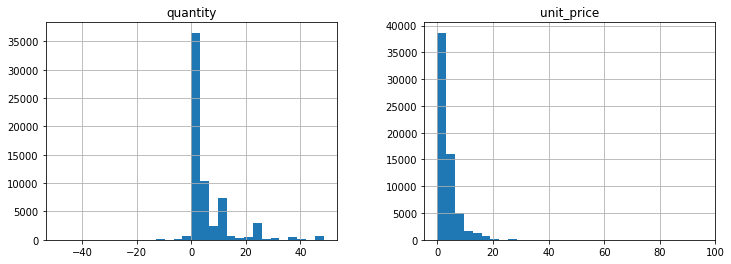

In [110]:
df[(df['quantity']>-50) & 
   (df['quantity']<50) & 
   (df['unit_price']>0) & 
   (df['unit_price']<100)].select_dtypes(include=[np.number]).hist(figsize=[12,4], bins=30)